In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
%matplotlib inline
import GraphHelpers as GH

Lattitude = -43.38
LongitudeTZ = 185
LongitudeML = 360 - 172.28

In [2]:
fPAR = pd.read_pickle('.\DataFrames\CoverData.pkl')

In [3]:
fPAR.columns = fPAR.columns.droplevel(0)

In [6]:
GPs = GH.SetGraphicsPatterns(fPAR.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'])

Crop
['Lucerne', 'Ryegrass']
Irrigation
['Dry', 'High', 'Low', 'Mid']
Treatments
MultiIndex(levels=[['Lucerne', 'Ryegrass'], ['Dry', 'High', 'Low', 'Mid']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]])
Styles
[('-', 'red', 0.15, 'o'), ('-', 'blue', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'orange', 0.15, 'o'), ('--', 'red', 0.45, '^'), ('--', 'blue', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'orange', 0.45, '^')]
StyleFrame
              Lin     Col   Alp Mar     MFC
Lucerne  Dry    -     red  0.15   o     red
         High   -    blue  0.15   o    blue
         Low    -   green  0.15   o   green
         Mid    -  orange  0.15   o  orange
Ryegrass Dry   --     red  0.45   ^   white
         High  --    blue  0.45   ^   white
         Low   --   green  0.45   ^   white
         Mid   --  orange  0.45   ^   white


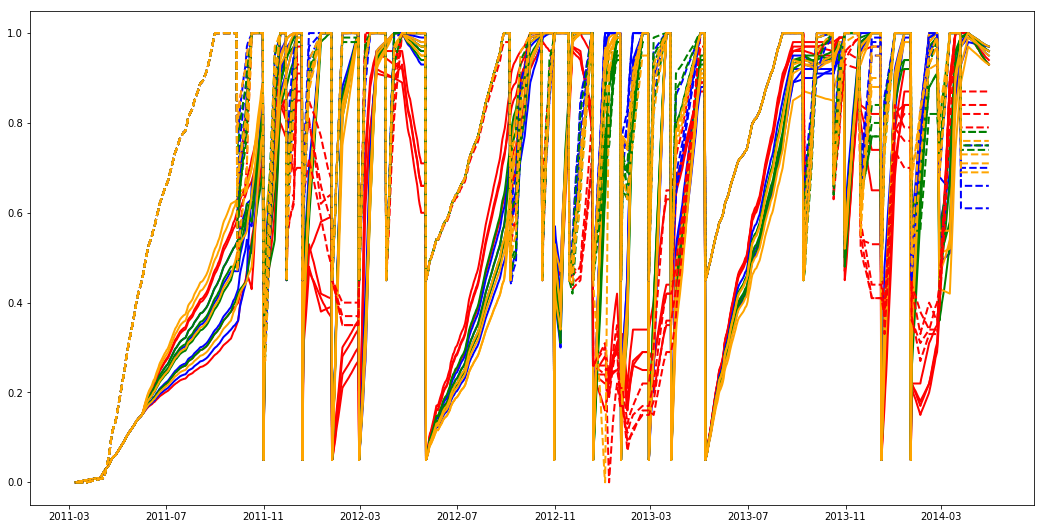

In [7]:
Graph = plt.figure(figsize=(18,20))
ax = Graph.add_subplot(2,1,1)
GH.AddIndexedPlot(fPAR,ax,GPs,2)

In [8]:
def EstAlbedo(FPAR,coeff,intercept):
    _return = np.multiply(FPAR,coeff)
    _return = np.exp(_return)
    _return = np.multiply(_return,intercept)
    return _return

In [9]:
EstAlbedoDF = fPAR.copy()
EstAlbedoDF = pd.concat([EstAlbedoDF],axis=1,keys=['AlbedoCorEstInt'],names=['Measurement'])
for plot in EstAlbedoDF.AlbedoCorEstInt:
    EstAlbedoDF.AlbedoCorEstInt.loc[:,plot] = EstAlbedo(fPAR.loc[:,plot],0.5,0.15)

In [10]:
TnRData = pd.read_pickle('.\DataFrames\TempAndMet.pkl')
TnRHourlyMeans = TnRData.resample('H').mean()
TnRHourlyMeans.sort_index(axis=1,inplace=True)
TnRHourlySums = TnRData.resample('H').sum()
TnRHourlySums.sort_index(axis=1,inplace=True)
AlbedoHourly = EstAlbedoDF.resample('H').ffill().reindex(TnRHourlyMeans.index)
AlbedoHourly.sort_index(axis=1,inplace=True)

In [11]:
TnRData

Measurement         AirTemperature BatteryVoltage  DOY   Duration HeatFlux  \
Species                       Expt           Expt Expt       Expt  Lucerne   
Irrigation                    Expt           Expt Expt       Expt      Dry   
Block                         Expt           Expt Expt       Expt        3   
2012-07-01 00:00:00         -3.200            NaN  NaN        NaN      NaN   
2012-07-01 00:00:00         -3.200            NaN  183  15.500000      NaN   
2012-07-01 00:10:00         -3.300            NaN  183   0.166667      NaN   
2012-07-01 00:10:00         -3.300            NaN  NaN        NaN      NaN   
2012-07-01 00:20:00         -3.400            NaN  NaN        NaN      NaN   
2012-07-01 00:20:00         -3.400            NaN  183   0.166667      NaN   
2012-07-01 00:30:00         -3.100            NaN  NaN        NaN      NaN   
2012-07-01 00:30:00         -3.100            NaN  183   0.166667      NaN   
2012-07-01 00:40:00         -3.100            NaN  183   0.166667      NaN   
2012-07-01 00:40:00         -3.100            NaN  NaN        NaN      NaN   
2012-07-01 00:50:00         -3.000            NaN  183   0.166667      NaN   
2012-07-01 00:50:00         -3.000            NaN  NaN        NaN      NaN   
2012-07-01 01:00:00         -2.800            NaN  183   0.166667      NaN   
2012-07-01 01:00:00         -2.800            NaN  NaN        NaN      NaN   
2012-07-01 01:10:00         -2.400            NaN  183   0.166667      NaN   
2012-07-01 01:10:00         -2.400            NaN  NaN        NaN      NaN   
2012-07-01 01:20:00         -2.200            NaN  183   0.166667      NaN   
2012-07-01 01:20:00         -2.200            NaN  NaN        NaN      NaN   
2012-07-01 01:30:00         -1.900            NaN  NaN        NaN      NaN   
2012-07-01 01:30:00         -1.900            NaN  183   0.166667      NaN   
2012-07-01 01:40:00         -1.700            NaN  NaN        NaN      NaN   
2012-07-01 01:40:00         -1.700            NaN  183   0.166667      NaN   
2012-07-01 01:50:00         -1.500            NaN  183   0.166667      NaN   
2012-07-01 01:50:00         -1.500            NaN  NaN        NaN      NaN   
2012-07-01 02:00:00         -1.400            NaN  NaN        NaN      NaN   
2012-07-01 02:00:00         -1.400            NaN  183   0.166667      NaN   
2012-07-01 02:10:00         -1.200            NaN  NaN        NaN      NaN   
2012-07-01 02:10:00         -1.200            NaN  183   0.166667      NaN   
2012-07-01 02:20:00         -1.200            NaN  183   0.166667      NaN   
2012-07-01 02:20:00         -1.200            NaN  NaN        NaN      NaN   
...                            ...            ...  ...        ...      ...   
2014-05-09 01:15:00          6.519          12.86  129   0.250000   -2.127   
2014-05-09 01:30:00          6.395          12.86  129   0.250000   -2.304   
2014-05-09 01:45:00          6.284          12.85  129   0.250000   -2.431   
2014-05-09 02:00:00          6.285          12.85  129   0.250000   -2.634   
2014-05-09 02:15:00          6.427          12.84  129   0.250000   -2.712   
2014-05-09 02:30:00          6.397          12.84  129   0.250000   -2.876   
2014-05-09 02:45:00          6.349          12.83  129   0.250000   -3.050   
2014-05-09 03:00:00          6.269          12.82  129   0.250000   -3.241   
2014-05-09 03:15:00          6.147          12.82  129   0.250000   -3.427   
2014-05-09 03:30:00          5.949          12.81  129   0.250000   -3.570   
2014-05-09 03:45:00          5.711          12.81  129   0.250000   -3.726   
2014-05-09 04:00:00          5.693          12.80  129   0.250000   -3.840   
2014-05-09 04:15:00          5.716          12.80  129   0.250000   -3.988   
2014-05-09 04:30:00          5.698          12.79  129   0.250000   -4.146   
2014-05-09 04:45:00          5.709          12.78  129   0.250000   -4.318   
2014-05-09 05:00:00          5.675          12.78  129   0.250000   -4.440   
2014-05-09 05:15:00   

## Set up dataframe for net radiation measured on detailed heat balance plots

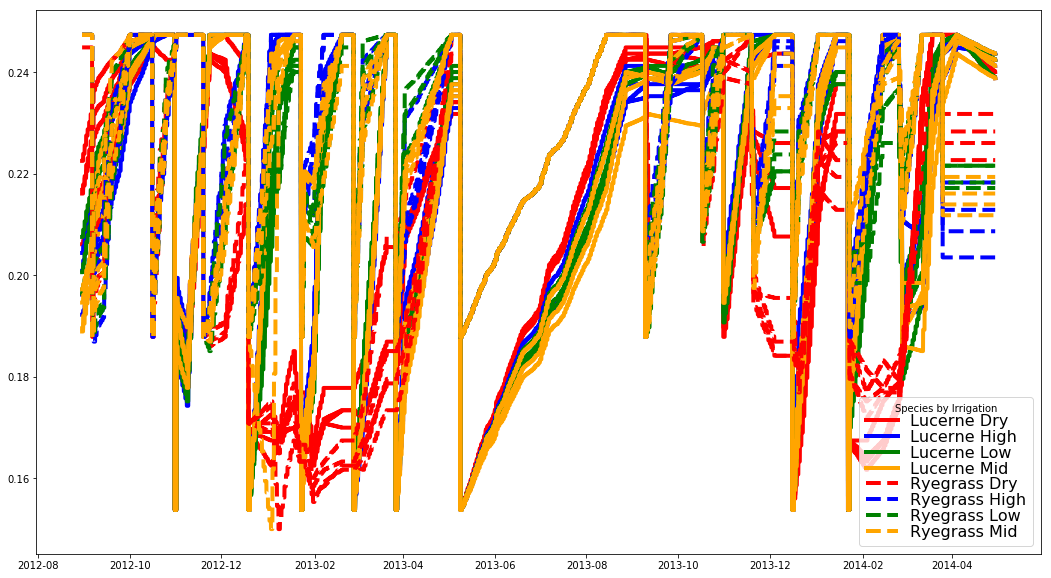

In [29]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(AlbedoHourly.AlbedoCorEstInt,ax,GPs,4)
labels, handles = GH.DedupLegendElements()
ledg = plt.legend(labels, handles,loc=4,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                          title='Species by Irrigation')

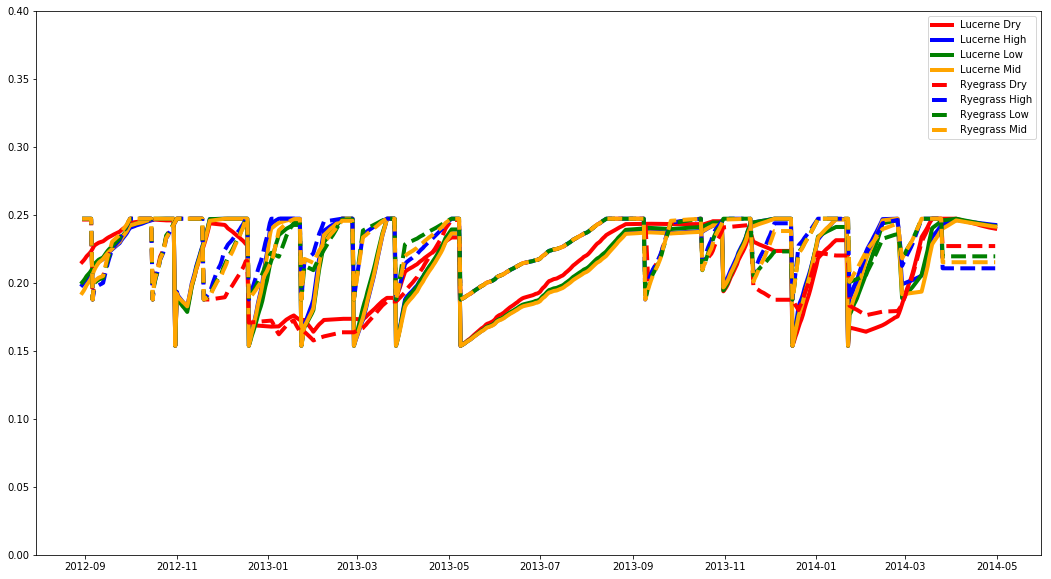

In [30]:
AlbedoDaily = AlbedoHourly.resample('D').mean().groupby(level=('Crop','Irrigation'),axis=1).mean()
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(AlbedoDaily,ax,GPs,4)
plt.ylim(0,0.4)
plt.legend()

In [31]:
RnDF = pd.DataFrame(index=AlbedoHourly.index,columns=AlbedoHourly.columns.droplevel(0))
RnDF.sort_index(axis=0, inplace=True)
RnDF.sort_index(axis=1, inplace=True)
for plot in RnDF.columns:
    RnDF.loc[:,plot] = [et.NetRadiation(TnRHourlySums.loc[x,'IncomingRadnMJ'].values[0],
                              TnRHourlyMeans.loc[x,'AirTemperature'].values[0],
                              TnRHourlyMeans.loc[x,'VP'].values[0],
                              Lattitude,
                              x.dayofyear,
                              TnRHourlyMeans.loc[x,'Duration'].values[0],
                              TnRHourlyMeans.loc[x,'Time'].values[0],
                              LongitudeTZ,
                              LongitudeML,
                              AlbedoHourly.AlbedoCorEstInt.loc[x,plot]) for x in RnDF.index]  

In [32]:
RnDaily = RnDF.resample('D').sum().groupby(level=('Crop','Irrigation'),axis=1).mean()
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(RnDaily,ax,GPs,4)
plt.plot(TnRHourlySums.loc[:,'IncomingRadnMJ'].resample('D').sum(),color='k',linewidth=3)
plt.legend()

In [33]:
Spare = RnDF.copy()

In [34]:
RnDF.Lucerne.resample('D').sum().to_pickle('.\DataFrames\LucDailyRn.pkl')
RnDF.Ryegrass.resample('D').sum().to_pickle('.\DataFrames\RyeDailyRn.pkl')

In [35]:
RnDF.columns

MultiIndex(levels=[['Lucerne', 'Ryegrass'], ['Dry', 'High', 'Low', 'Mid'], ['Lucerne', 'Ryegrass'], ['1', '2', '3', '4']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['Crop', 'Irrigation', 'Nitrogen', 'Block'])

In [36]:
RnDF.resample('D').sum().to_pickle('.\DataFrames\DailyRn.pkl')

## Convert radiation to W/m2

In [37]:
RnDF.index.name='Date'
RnDFLong = RnDF.unstack()
RnDFLong.name='Rn'
RnDFLong.to_pickle('.\DataFrames/NetRadiationMJ.pkl')
RnDFLong = RnDFLong * 1000000 / (60 * 60)

In [38]:
RnDFLong.name = 'Rn'

In [39]:
RnDFLong.to_pickle('.\DataFrames/NetRadiation.pkl')

In [40]:
RnDF.resample('D').sum()

Crop          Lucerne                                                         \
Irrigation        Dry                                        High              
Nitrogen      Lucerne                                     Lucerne              
Block               1          2          3          4          1          2   
Date                                                                           
2012-08-30  10.530111  10.385071  10.394865  10.307750  10.664465  10.717932   
2012-08-31  10.086249   9.943778   9.946413   9.865004  10.213225  10.265998   
2012-09-01   5.924949   5.837447   5.834145   5.787077   5.999427   6.032017   
2012-09-02   3.508626   3.453752   3.448344   3.420814   3.552965   3.573524   
2012-09-03   3.113160   3.063525   3.056737   3.032965   3.151925   3.170590   
2012-09-04   9.719576   9.567188   9.540216   9.470881   9.834274   9.891800   
2012-09-05   8.258031   8.124481   8.094741   8.037610   8.354265   8.404901   
2012-09-06   7.471019   7.344960   7.308800   7.259685   7.556208   7.604295   
2012-09-07  11.582542  11.382896  11.313640  11.242986  11.709138  11.785728   
2012-09-08   9.184172   9.027818   8.976158   8.915787   9.275539   9.337200   
2012-09-09  11.109288  10.923149  10.864053  10.787477  11.210738  11.285717   
2012-09-10  12.366708  12.162647  12.100456  12.011422  12.469960  12.553862   
2012-09-11  10.621437  10.447091  10.395348  10.316548  10.705357  10.777957   
2012-09-12   8.358093   8.221051   8.181240   8.117610   8.421386   8.479020   
2012-09-13  13.645102  13.425545  13.363540  13.258110  13.740978  13.834487   
2012-09-14  11.509332  11.325558  11.272707  11.190237  11.581263  11.664504   
2012-09-15   3.304820   3.250285   3.234328   3.211511   3.323761   3.349899   
2012-09-16   7.991699   7.866408   7.829141   7.780379   8.029863   8.093108   
2012-09-17   8.098167   7.973165   7.935455   7.889986   8.131558   8.197452   
2012-09-18  14.148101  13.932680  13.866902  13.793298  14.198604  14.316360   
2012-09-19  13.499343  13.295953  13.232926  13.168946  13.538815  13.654890   
2012-09-20   7.042004   6.935614   6.904185   6.871578   7.061050   7.121741   
2012-09-21  11.073206  10.910471  10.864719  10.816136  11.099909  11.192699   
2012-09-22  14.902310  14.687862  14.630734  14.568470  14.934176  15.056382   
2012-09-23  14.053378  13.853798  13.803359  13.746921  14.080156  14.193822   
2012-09-24  13.714536  13.522473  13.476898  13.424222  13.737164  13.846469   
2012-09-25  12.630399  12.458482  12.422994  12.378760  12.644994  12.742670   
2012-09-26   4.421379   4.360670   4.349891   4.335228   4.424650   4.459081   
2012-09-27  10.512689  10.376417  10.355858  10.324926  10.516100  10.593244   
2012-09-28  15.778953  15.581260  15.557179  15.515423  15.777654  15.889324   
...               ...        ...        ...        ...        ...        ...   
2014-04-10   4.311550   4.317534   4.317534   4.315542   4.317549   4.321541   
2014-04-11   3.425845   3.431579   3.431579   3.429670   3.430436   3.433107   
2014-04-12   2.735235   2.740567   2.740567   2.738793   2.738799   2.740580   
2014-04-13   3.264563   3.271136   3.271136   3.268949   3.268454   3.270147   
2014-04-14   4.244366   4.253666   4.253666   4.250572   4.249150   4.250827   
2014-04-15   6.000767   6.014826   6.014826   6.010150   6.006699   6.007933   
2014-04-16   3.330866   3.339834   3.339834   3.336852   3.334092   3.334321   
2014-04-17   1.464409   1.468876   1.468876   1.467391   1.465824   1.465746   
2014-04-18   2.118725   2.125493   2.125493   2.123244   2.120497   2.120006   
2014-04-19   8.997198   9.025338   9.025338   9.015986   9.003185   8.999760   
2014-04-20   7.481764   7.507611   7.507611   7.499024   7.486200   7.481984   
2014-04-21   7.731758   7.759731   7.759731   7.750439   7.735783   7.730441   
2014-04-22   2.169607   2.178907   2.178907   2.175819   2.170750   2.168776   
2014-04-23   4.038960   4.055775   4.055775   4.050191   4.040636   4.036676   
